In [1]:
!pip install tensorflow keras numpy matplotlib
!pip install fastapi uvicorn

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/f9/37/b97abb360b551fbf5870a0ee07e39ff9c655e6e3e2f839bc88be81361842/tensorflow-2.20.0-cp312-cp312-win_amd64.whl.metadata
  Using cached tensorflow-2.20.0-cp312-cp312-win_amd64.whl.metadata (4.6 kB)
  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/ba/61/cc8be27bd65082440754be443b17b6f7c185dec5e00dfdaeab4f8662e4a8/keras-3.12.0-py3-none-any.whl.metadata
  Using cached keras-3.12.0-py3-none-any.whl.metadata (5.9 kB)
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/2d/57/8aeaf160312f7f489dea47ab61e430b5cb051f59a98ae68b7133ce8fa06a/numpy-2.3.5-cp312-cp312-win_amd64.whl.metadata
  Using cached numpy-2.3.5-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/31/3c/80816f027b3a4a28cd2a0a6ef7f89a2db22310e945cd886ec25bfb399221/matplotlib-3.


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for fastapi from https://files.pythonhosted.org/packages/25/c5/8a5231197b81943b2df126cc8ea2083262e004bee3a39cf85a471392d145/fastapi-0.124.2-py3-none-any.whl.metadata
  Obtaining dependency information for uvicorn from https://files.pythonhosted.org/packages/ee/d9/d88e73ca598f4f6ff671fb5fde8a32925c2e08a637303a1d12883c7305fa/uvicorn-0.38.0-py3-none-any.whl.metadata
  Using cached uvicorn-0.38.0-py3-none-any.whl.metadata (6.8 kB)
  Obtaining dependency information for starlette<0.51.0,>=0.40.0 from https://files.pythonhosted.org/packages/d9/52/1064f510b141bd54025f9b55105e26d1fa970b9be67ad766380a3c9b74b0/starlette-0.50.0-py3-none-any.whl.metadata
  Using cached starlette-0.50.0-py3-none-any.whl.metadata (6.3 kB)
  Obtaining dependency information for pydantic!=1.8,!=1.8.1,!=2.0.0,!=2.0.1,!=2.1.0,<3.0.0,>=1.7.4 from https://files.pythonhosted.org/packages/5a/87/b70ad306ebb6f9b585f114d0ac2137d792b48be34d732d60e597c2f8465a/pydantic-2.12.5-py3-none-any.whl.me


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt  

In [ ]:
IMAGE_SIZE= 256
BATCH_SIZE= 32
CHANNELS=3
EPOCHS=30

In [142]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "pdd",
    shuffle=True,
    label_mode="categorical",
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)  

Found 13754 files belonging to 26 classes.


print(1779/32)

In [143]:
class_names=dataset.class_names
class_names

['Eggplant__Healthy_Leaf',
 'Eggplant__Insect_Pest_Disease',
 'Eggplant__Leaf_Spot_Disease',
 'Eggplant__Mosaic_Virus_Disease',
 'Eggplant__Small_Leaf_Disease',
 'Eggplant__White_Mold_Disease',
 'Eggplant__Wilt_Disease',
 'Lemon__Anthracnose',
 'Lemon__Bacterial_Blight',
 'Lemon__Citrus_Canker',
 'Lemon__Curl_Virus',
 'Lemon__Deficiency_Leaf',
 'Lemon__Dry_Leaf',
 'Lemon__Healthy_Leaf',
 'Lemon__Sooty_Mould',
 'Lemon__Spider_Mites',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [144]:
len(dataset)

430

(32, 26)


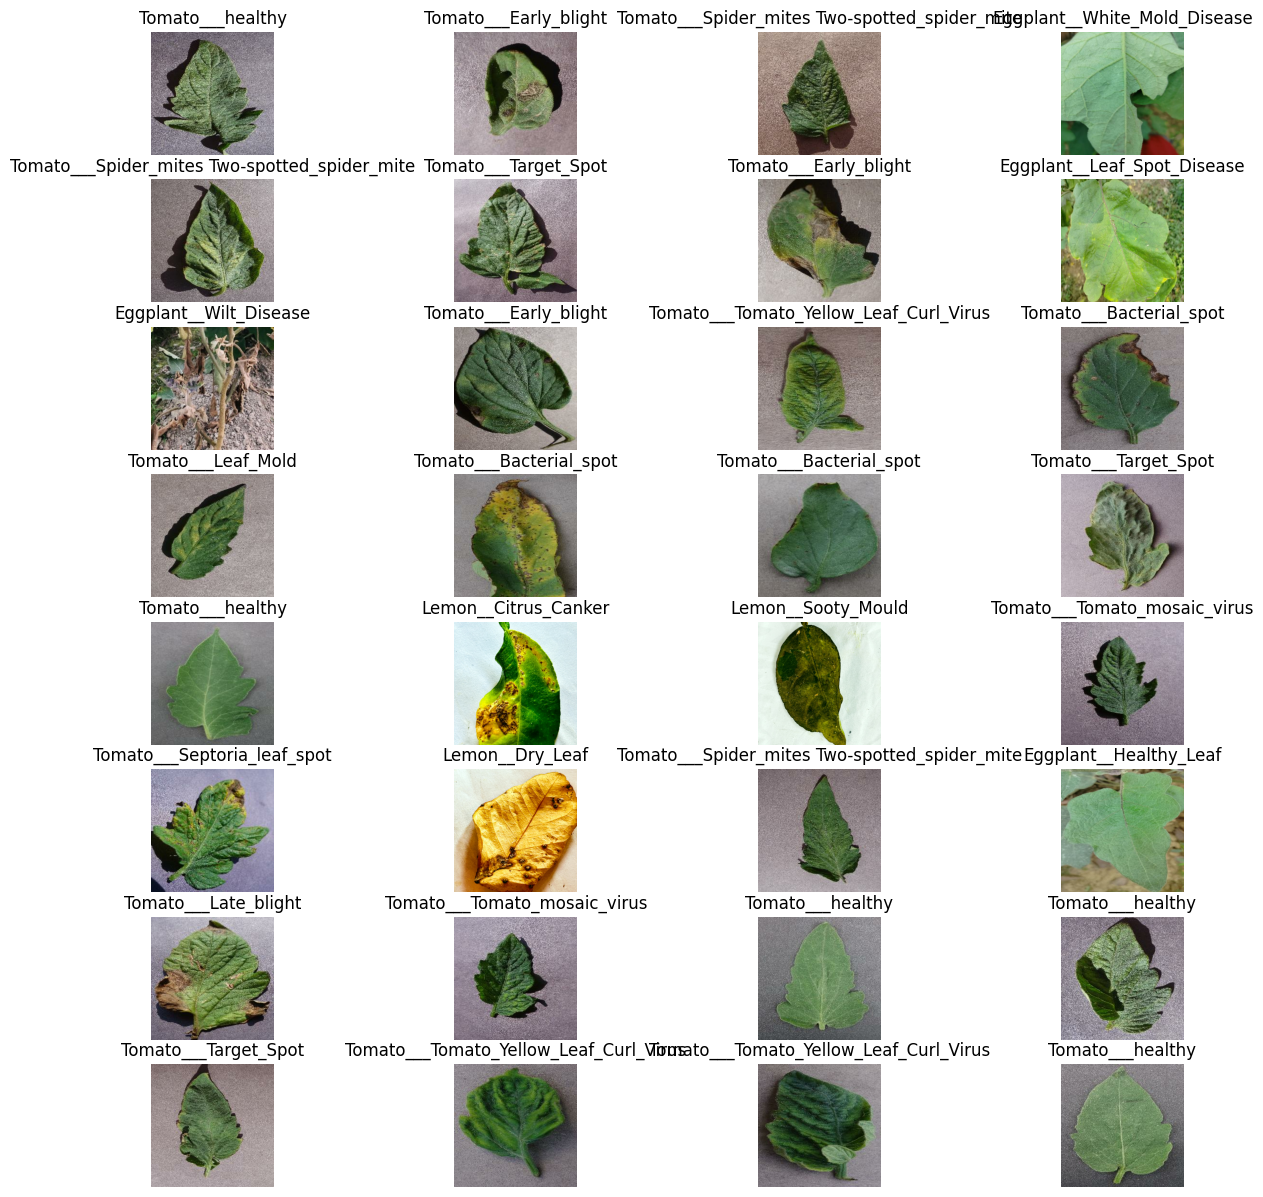

In [145]:
plt.figure(figsize=(15,15))
for image_batch, label_batch in dataset.take(1):
   print(label_batch.shape)
   for i in range(32):
      ax=plt.subplot(8,4,i+1)
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      plt.axis("off")
      plt.title(class_names[label_batch[i].numpy().argmax()])

In [1]:
len(dataset)*0.8

NameError: name 'dataset' is not defined

In [147]:
#80%==> training
#20%==> 10% test,10% validation

In [148]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=1000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(ds_size*train_split)
    val_size=int(ds_size*val_split)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size).take(val_size)
    return train_ds,val_ds,test_ds

In [149]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [150]:
len(train_ds)

344

In [151]:
len(test_ds)

43

In [152]:
len(val_ds)

43

In [153]:
train_ds= train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds= val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds= test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [154]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255)
])

In [155]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [156]:
input_shape= (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 26

model = models.Sequential([
    layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'), 
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

#model.build(input_shape=input_shape) 

In [157]:
model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_18 (Sequential)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_19 (Sequential)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 26)             │         1,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 897,818 (3.42 MB)

 Trainable params: 897,818 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

In [158]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [159]:
history= model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 233s 587ms/step - accuracy: 0.3580 - loss: 1.9653 - val_accuracy: 0.5015 - val_loss: 1.4568
Epoch 2/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 158s 457ms/step - accuracy: 0.6392 - loss: 1.0553 - val_accuracy: 0.6119 - val_loss: 1.1265
Epoch 3/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 152s 442ms/step - accuracy: 0.7121 - loss: 0.8263 - val_accuracy: 0.6686 - val_loss: 0.9469
Epoch 4/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 144s 418ms/step - accuracy: 0.7477 - loss: 0.7097 - val_accuracy: 0.6773 - val_loss: 0.9221
Epoch 5/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 146s 423ms/step - accuracy: 0.7700 - loss: 0.6464 - val_accuracy: 0.6635 - val_loss: 1.0386
Epoch 6/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 145s 422ms/step - accuracy: 0.7919 - loss: 0.5922 - val_accuracy: 0.7580 - val_loss: 0.7097
Epoch 7/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 135s 392ms/step - accuracy: 0.8159 - loss: 0.5171 - val_accuracy: 0.7624 - val_loss: 0.6948
Epoch 8/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 138s 402ms/step - accuracy: 0.8142 -

In [160]:
scores=model.evaluate(test_ds)

43/43 ━━━━━━━━━━━━━━━━━━━━ 78s 137ms/step - accuracy: 0.8968 - loss: 0.2745


In [161]:
scores

[0.27445054054260254, 0.8968023061752319]

In [178]:
import numpy as np
def predict_image(path):
    # Step 1: Load image
    img = tf.keras.utils.load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    
    # Step 2: Convert to array
    img_array = tf.keras.utils.img_to_array(img)
    
    # Step 3: Add batch dimension (1, H, W, C)
    img_array = np.expand_dims(img_array, axis=0)

    # Step 4: Predict
    pred = model.predict(img_array)
    
    # Step 5: Convert probabilities → class label
    index = np.argmax(pred)
    label = class_names[index]
    
    return label, pred[0][index], img

label, confidence, img = predict_image(r"C:\Users\victus\Desktop\shourya.jpeg")
print("Predicted:", label, "Confidence:", confidence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted: Tomato___Late_blight Confidence: 0.9867242


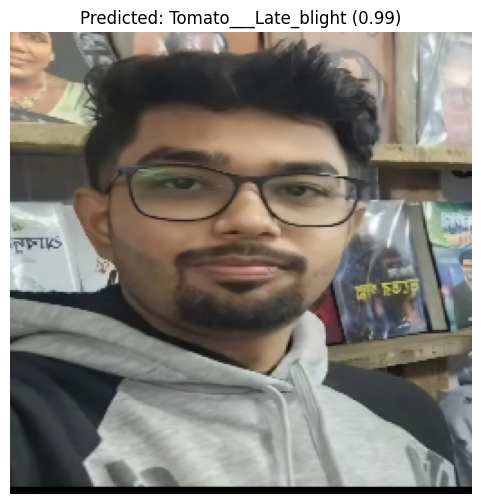

In [179]:
plt.figure(figsize=(6,6))
plt.title(f"Predicted: {label} ({confidence:.2f})")
plt.imshow(img)
plt.axis("off")
plt.show()


In [41]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 44}

In [42]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

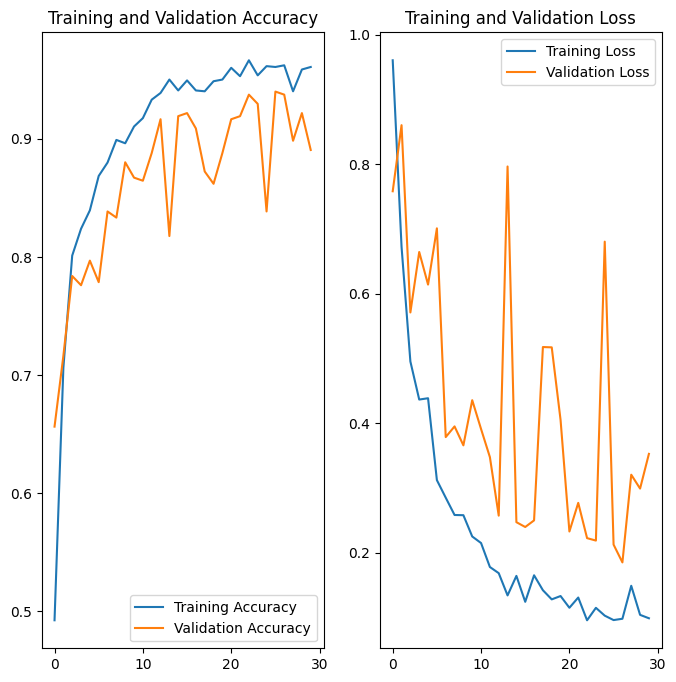

In [46]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Apple_Apple_scab
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
predicted label: Apple_Apple_scab


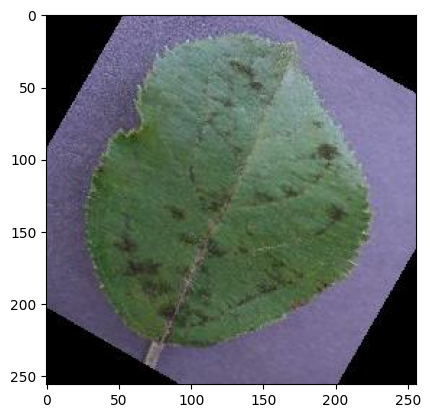

In [57]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [58]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


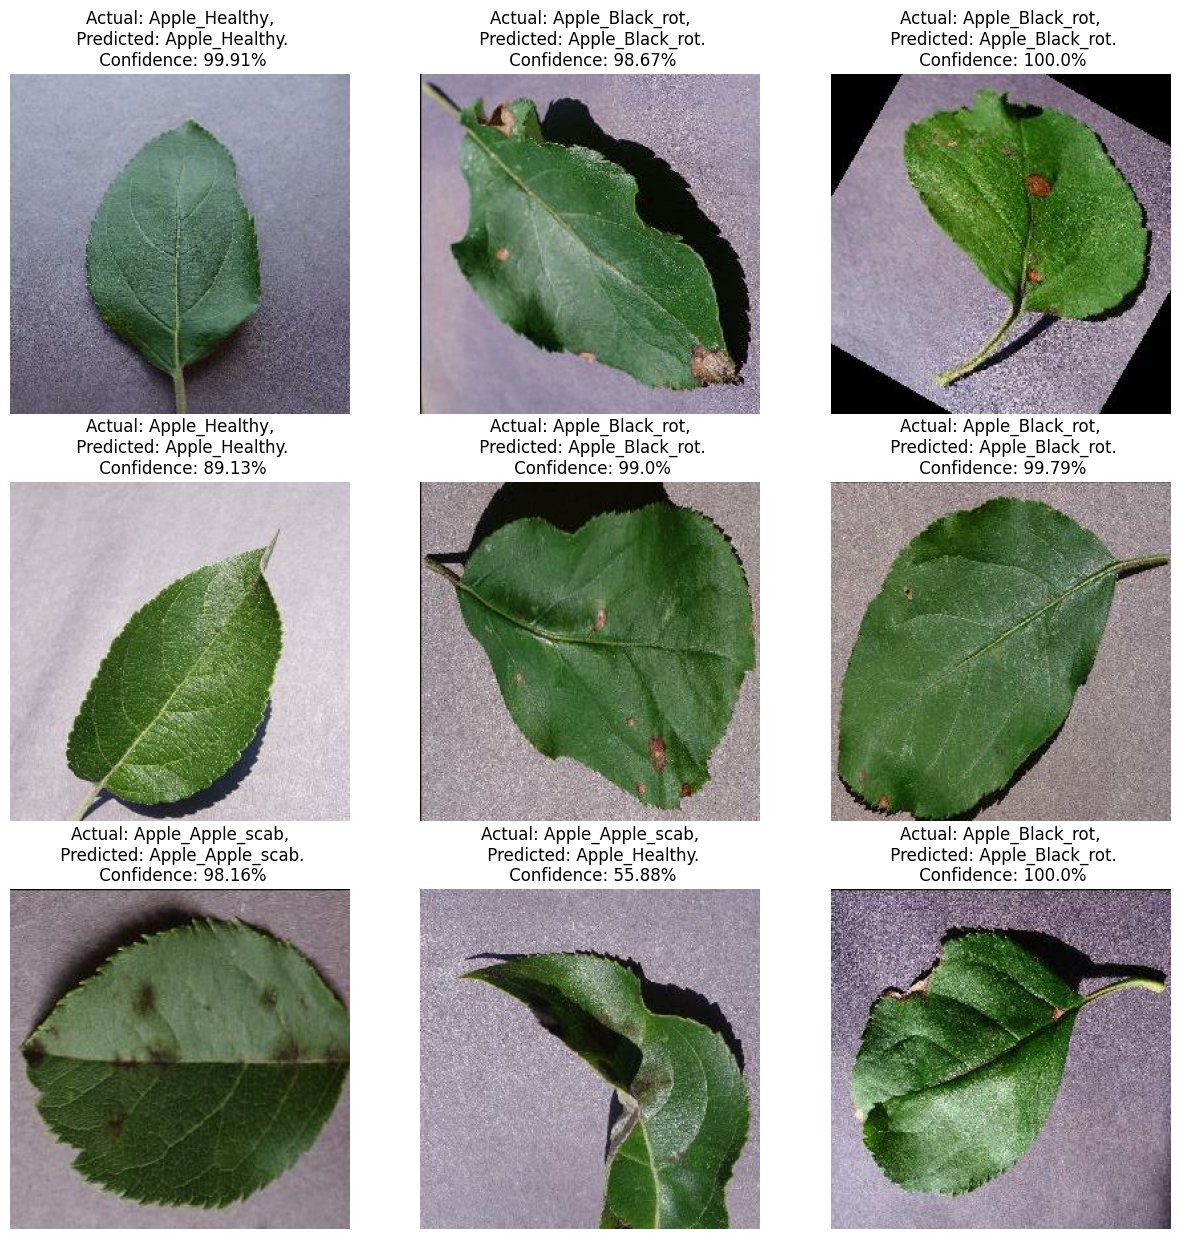

In [59]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [82]:
model.save('my_model.keras')